In [1]:

!pip install -q kaggle
from google.colab import files
files.upload()
#upload your kaggle.json kaggle api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexaman","key":"08dcce3ac11a60e2d7fbc050061b87e0"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits







Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/127_100.jpg  
  in

Data link from Kaggle - > https://www.kaggle.com/moltean/fruits

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

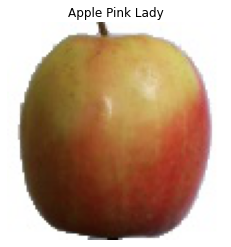

In [4]:
img = load_img(train_path + "Apple Pink Lady/0_100.jpg")
plt.imshow(img)
plt.title("Apple Pink Lady")
plt.axis("off")
plt.show()

In [5]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)



(100, 100, 3)


In [6]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  131


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


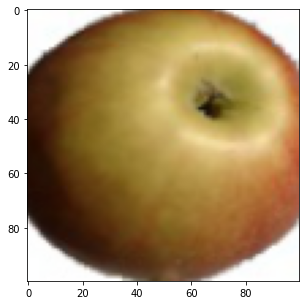

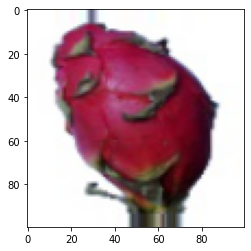

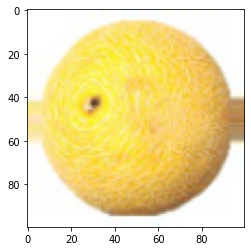

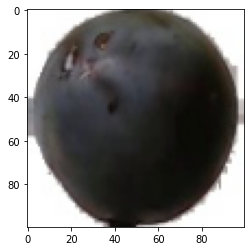

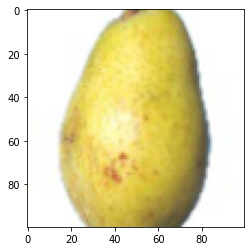

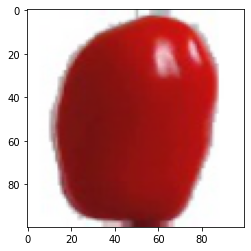

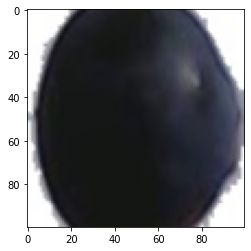

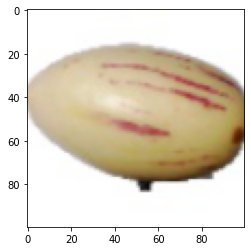

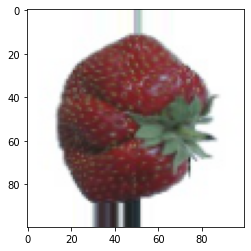

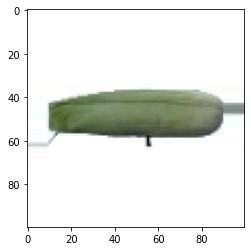

In [8]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()
    
   

In [9]:
#model = Sequential()
#model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
#model.add(MaxPooling2D())

#model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
#model.add(MaxPooling2D())

#model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
#model.add(MaxPooling2D())

In [10]:
#model.add(Flatten())
#model.add(Dense(1024,activation='relu'))

In [11]:
#model.add(Dropout(0.5))
#model.add(Dense(number_of_class,activation = 'softmax'))

In [12]:
#model.compile(loss = 'categorical_crossentropy',
 #             optimizer = 'rmsprop',
  #            metrics = ['accuracy'])
#batch_size = 32
#number_of_batch = 1600 // batch_size

#hist = model.fit_generator(
 #   generator = train_generator,
  #  steps_per_epoch = number_of_batch,
   # epochs = 100,
    #validation_data = test_generator,
    #validation_steps = 800 // batch_size
       #            )

In [13]:
#print(hist.history.keys())
#plt.plot(hist.history["loss"],label = "Train Loss")
#plt.plot(hist.history["val_loss"],label = "Validaton Loss")
#plt.legend()
#plt.show()

In [14]:
#plt.figure()
#plt.plot(hist.history["accuracy"],label = "Train Accuracy")
#plt.plot(hist.history["val_accuracy"2],label = "Validaton Accuracy")
#plt.legend()
#plt.show()

In [15]:
!mkdir /content/cnnmodel
!mkdir savedmodel


In [16]:
import tensorflow as tf
with tf.Graph().as_default():
 with tf.compat.v1.Session()  as sess:
    model = Sequential() 
    model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(number_of_class,activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
    batch_size = 32
    number_of_batch = 1600 // batch_size
    tf.compat.v1.disable_eager_execution()
    hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    saver = tf.compat.v1.train.Saver()
    saver.save(sess,'./cnnmodel/cnnfruit.ckpt')
    tf.compat.v1.train.write_graph(sess.graph.as_graph_def(), '.', '/content/savedmodel/saved_model.pbtxt', as_text='utf-8')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - ETA: 0s - batch: 24.5000 - size: 32.0000 - loss: 4.7097 - accuracy: 0.0344WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50/50 [==============================] - 5s 105ms/step - batch: 24.5000 - size: 32.0000 - loss: 4.7097 - accuracy: 0.0344 - val_loss: 4.2933 - val_accuracy: 0.0600
Epoch 2/100
50/50 [==============================] - 6s 117ms/step - batch: 24.5000 - size: 32.0000 - loss: 3.8919 - accuracy: 0.0812 - val_loss: 3.2293 - val_accuracy: 0.2175
Epoch 3/100
50/50 [==============================] - 6s 117ms/step - batch: 24.5000 - size: 32.0000 - l